# 1. Introduction

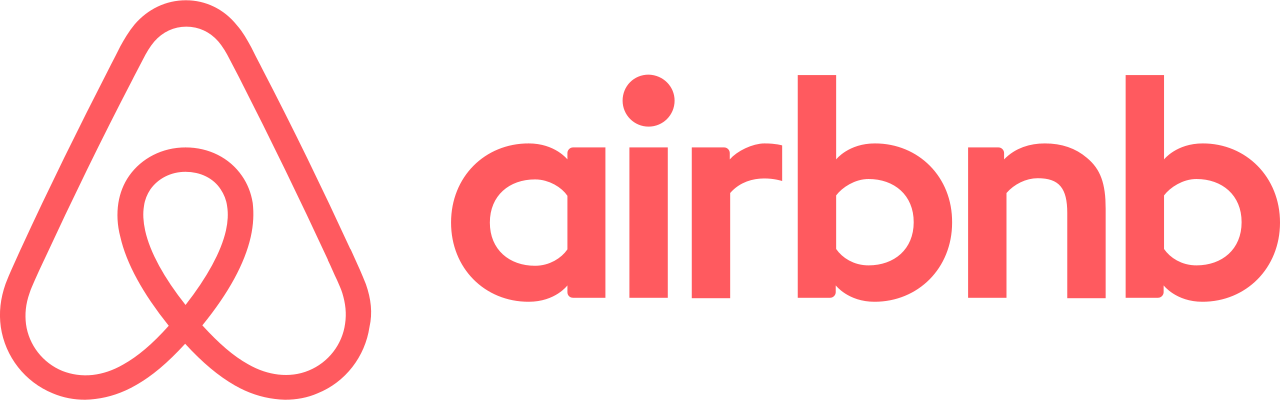

Airbnb is an online marketplace that connects people who are looking for a place to stay with individuals who have a spare room or property to rent out. Founded in 2008, Airbnb has become a popular platform for travelers to find unique and affordable accommodations all around the world. Hosts can list their properties on the website and set their own prices and availability, while guests can search for listings based on their preferences and book directly with the host. Airbnb offers a range of different types of accommodations, from private rooms in a shared apartment to entire houses and apartments. The platform also provides a review system, allowing guests to leave feedback on their stay and helping hosts build a positive reputation.





# 2. Librairies and Data extraction

In [1]:
# data analysis
import pandas as pd
import numpy as np

# data visualization

import seaborn as sns
import matplotlib.pyplot  as plt
!pip install missingno
import missingno as msno

from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error


In [2]:
df = pd.read_csv('/Users/jeanlahellec/Downloads/archive-2/AB_NYC_2019.csv')


Let us examine the dataset

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Our goal is to predict our target variable - price based on the other features

In [4]:
#Size of dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# Descriptive statistics of our variables

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
# Variable types
    
df.dtypes.value_counts()

int64      7
object     6
float64    3
dtype: int64

In [7]:
df.columns 

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# 3. Data Cleaning

### 3.a) Dealing with missing values 

In [8]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<AxesSubplot:>

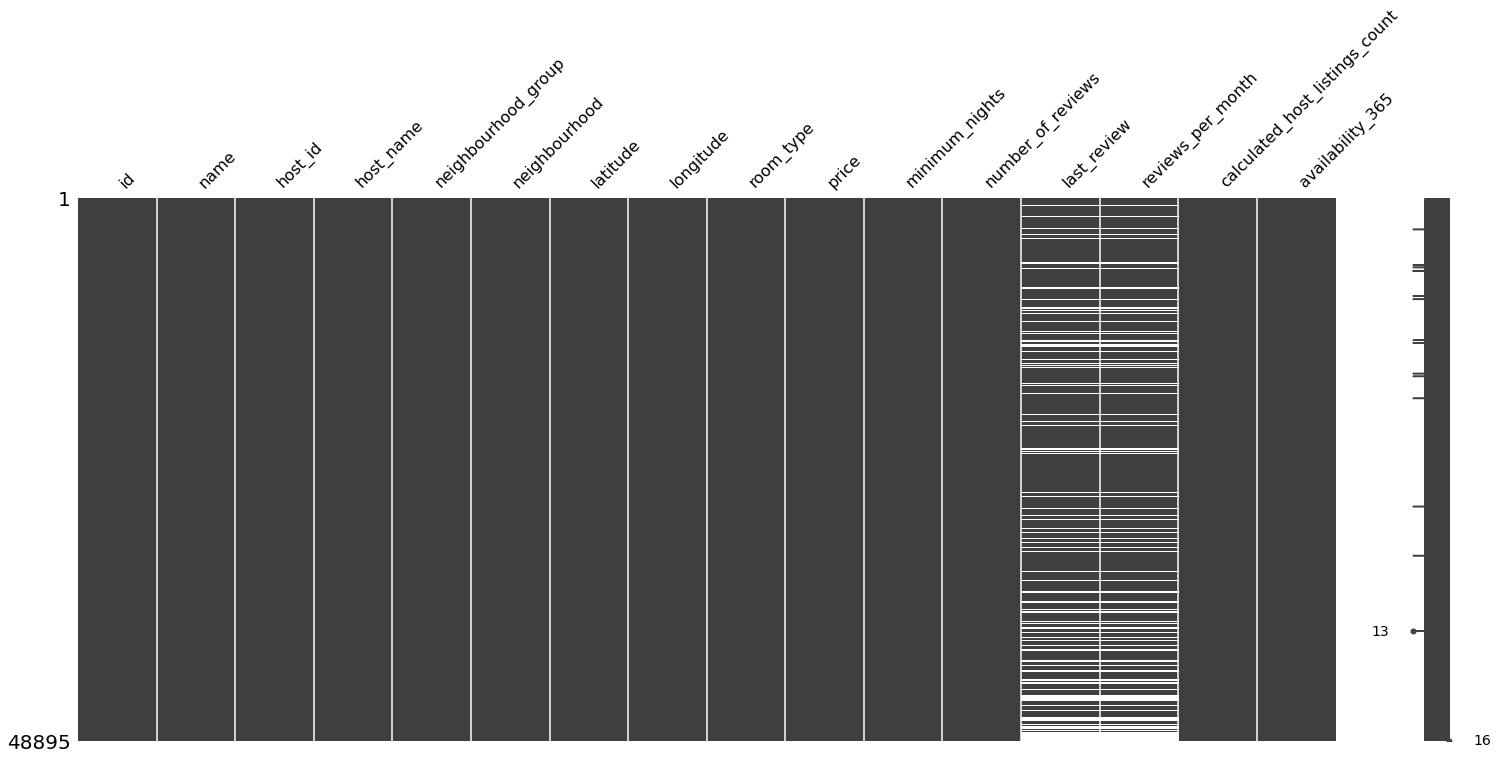

In [9]:
#Visualization for missing values
msno.matrix(df)

The feature "reviews_per_month" contains some incomplete data which will be substituted with the mean.

In [10]:
mean = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(mean, inplace=True)
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

For our analysis, we won't need the following features : host_name and id. Therefore, we drop it from out dataframe

In [11]:
#df = df.drop(columns=['host_name','id'])
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


### 3.b) Data Transformation 

/Users/jeanlahellec/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

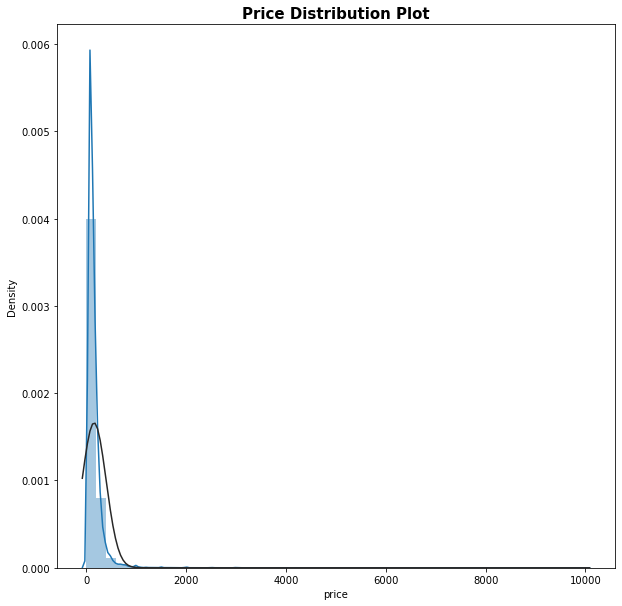

In [12]:
plt.figure(figsize=(10,10))
sns.distplot(df['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

The distribution graph depicted above indicates that the price feature follows a right-skewed distribution with a positive skewness. To mitigate this skewness and improve the interpretability and statistical analysis of the data, a log transformation will be applied to the feature. However, as division by zero is a potential issue, a log+1 transformation would be more suitable in this case.





In [13]:
df['price_log'] = np.log(df.price+1)

By transorming price into log_price, price feature shows a normal distribution

/Users/jeanlahellec/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

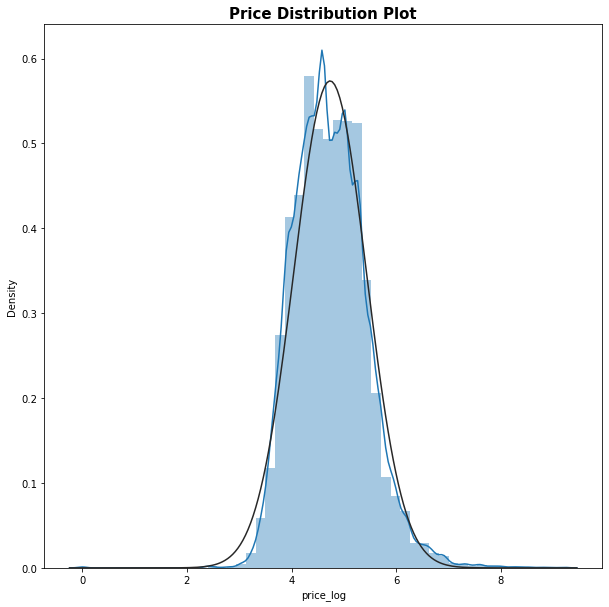

In [14]:
plt.figure(figsize=(10,10))
sns.distplot(df['price_log'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

### 3.c) Visualizing and dealing with outliers

Text(0.5, 1.0, 'reviews_per_month')

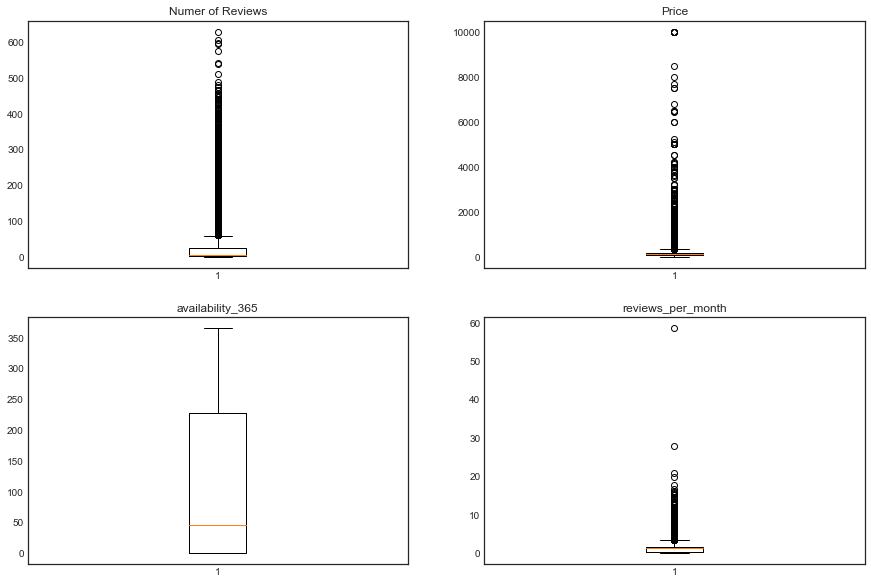

In [15]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(df['number_of_reviews'])
ax.set_title('Numer of Reviews')
ax=plt.subplot(222)
plt.boxplot(df['price'])
ax.set_title('Price')
ax=plt.subplot(223)
plt.boxplot(df['availability_365'])
ax.set_title('availability_365')
ax=plt.subplot(224)
plt.boxplot(df['reviews_per_month'])
ax.set_title('reviews_per_month')

All variables except availability_365 have a lot of outliers. We will get rid of them by using the inter quantile range in order to simplify our analysis 

In [16]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 *IQR)
df1=df.loc[filter]

Q1 = df1['number_of_reviews'].quantile(0.25)
Q3 = df1['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df1['number_of_reviews'] >= Q1 - 1.5 * IQR) & (df1['number_of_reviews'] <= Q3 + 1.5 *IQR)
df2=df1.loc[filter]


Q1 = df2['reviews_per_month'].quantile(0.25)
Q3 = df2['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df2['reviews_per_month'] >= Q1 - 1.5 * IQR) & (df2['reviews_per_month'] <= Q3 + 1.5 *IQR)
df_new=df2.loc[filter]

Text(0.5, 1.0, 'reviews_per_month')

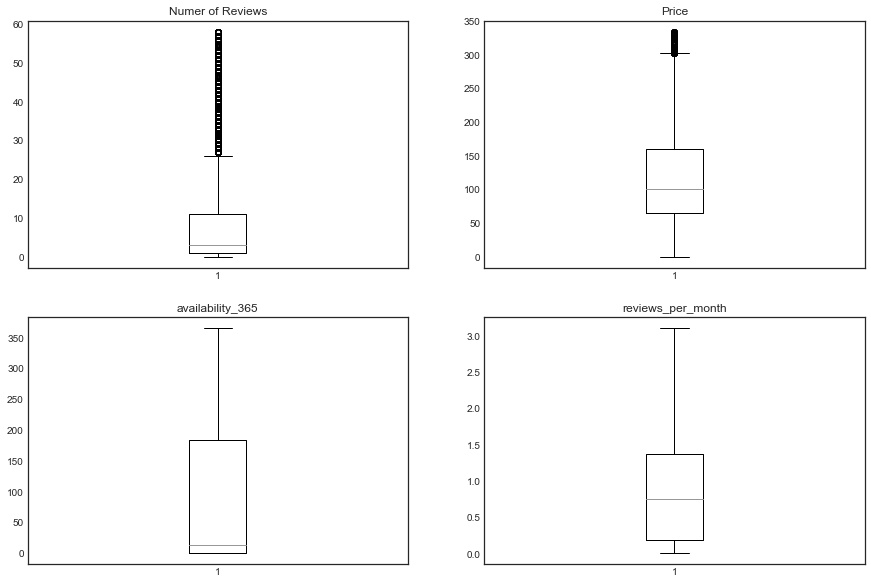

In [17]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(df_new['number_of_reviews'])
ax.set_title('Numer of Reviews')
ax=plt.subplot(222)
plt.boxplot(df_new['price'])
ax.set_title('Price')
ax=plt.subplot(223)
plt.boxplot(df_new['availability_365'])
ax.set_title('availability_365')
ax=plt.subplot(224)
plt.boxplot(df_new['reviews_per_month'])
ax.set_title('reviews_per_month')

# 4. Data Exploratory Analysis


This graph will enable us to count categorical variables with bar charts

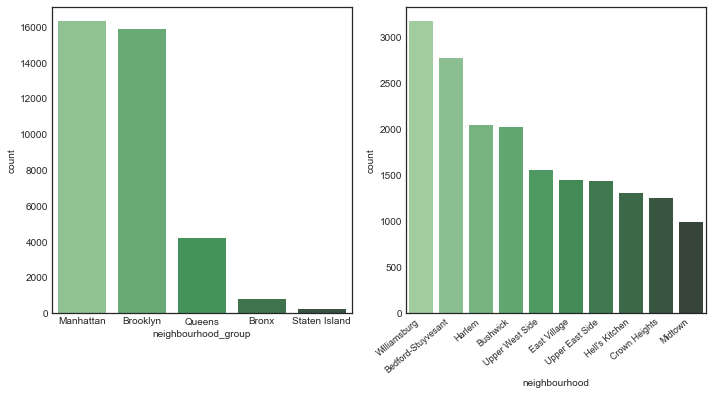

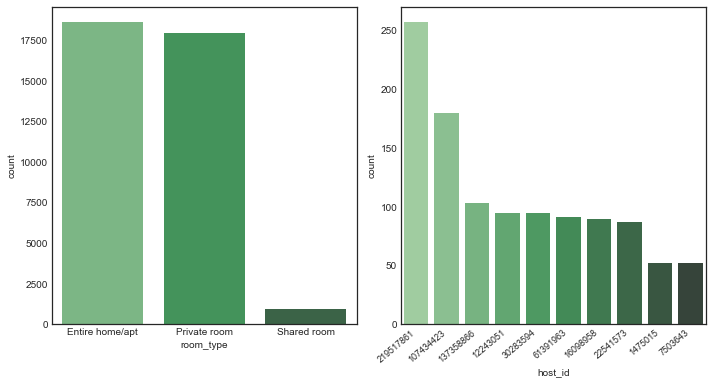

In [18]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
#Neighbourhood group
plt.subplot(221)
sns.countplot(x="neighbourhood_group", data=df_new, palette="Greens_d",
              order=df_new.neighbourhood_group.value_counts().index)
fig = plt.gcf()
fig.set_size_inches(10,10)

#Top 10 Neighbourhood
plt.subplot(222)
ax=sns.countplot(x="neighbourhood", data=df_new, palette="Greens_d",
              order=df_new.neighbourhood.value_counts().iloc[:10].index)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.tight_layout()
plt.show()

#Room type
plt.subplot(223)
sns.countplot(x="room_type", data=df_new, palette="Greens_d",
              order=df_new.room_type.value_counts().index)
fig = plt.gcf()
fig.set_size_inches(10,10)

#Top 10 hosts
plt.subplot(224)
ax=sns.countplot(x="host_id", data=df_new, palette="Greens_d",
              order=df_new.host_id.value_counts().iloc[:10].index)
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.tight_layout()
plt.show()


When looking at the location-based on the neighborhood group, Manhattan and Brooklyn are ranked first and second, respectively, based on the size and the number of people who have booked a room. Following them in rank are Queens, Bronx, and Staten Island. Additionally, the top 10 areas based on neighborhood are also displayed, with Williamsburg ranking first with almost 3000 bookings.

In terms of the type of room booked, most bookings were for entire homes, with private and shared rooms being less common. Finally, the user with the highest number of bookings is associated with the host ID 219517861, making them the best customer of Airbnb in New York.

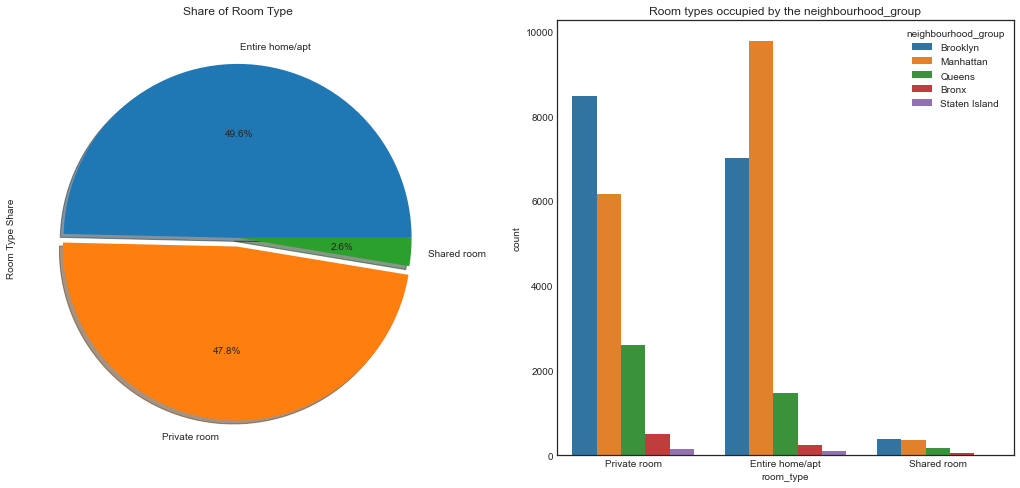

In [19]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
df_new['room_type'].value_counts().plot.pie(explode=[0,0.05,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Room Type')
ax[0].set_ylabel('Room Type Share')
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = df_new)
ax[1].set_title('Room types occupied by the neighbourhood_group')
plt.show()

From the graph above, we can state that shared rooms are very less prefered compared to the other room types. 
In Brooklyn, guests tend to book private rooms while in Manhattan, they would rather book entire homes and appartments.

The next graph is about relationship between price and room type. Shared room prices are always lower than $2000 while private rooms and entire homes have the highest prices. We decided to keep outliers for the following graphs in order to have more insights on airbnb properties

Text(0.5, 1.0, 'Room Type vs Price')

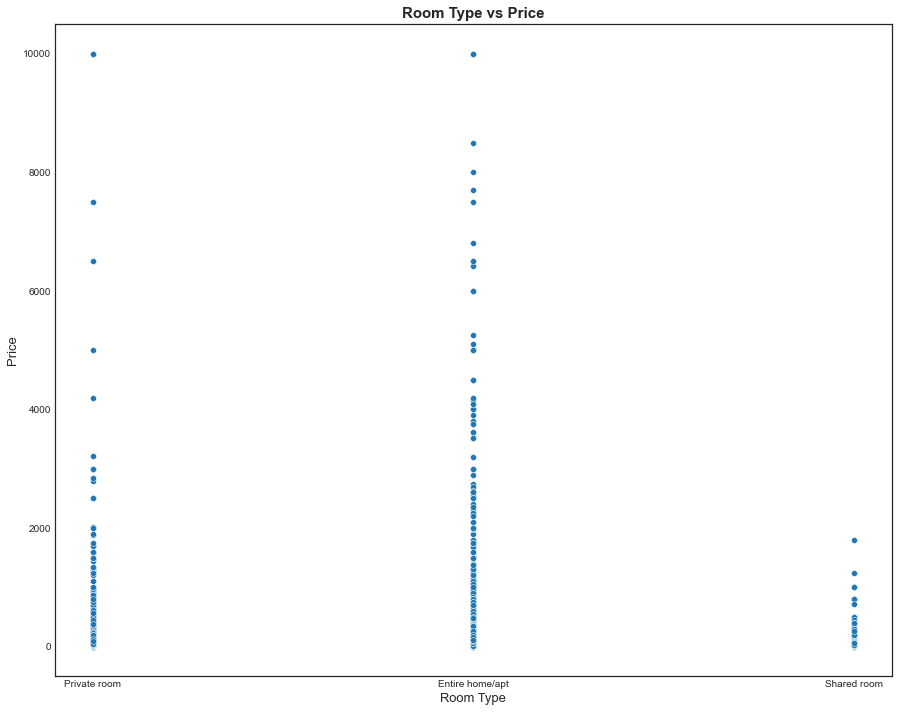

In [20]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='price', data=df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

The next graph depicts the relationship between neighborhood group, room type, and price. In Manhattan, the Private Room and Entire Home/Apt have the highest prices, while Brooklyn boasts very high prices for both room types. In contrast, the highest price for a shared room is found in the Queens area.


Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

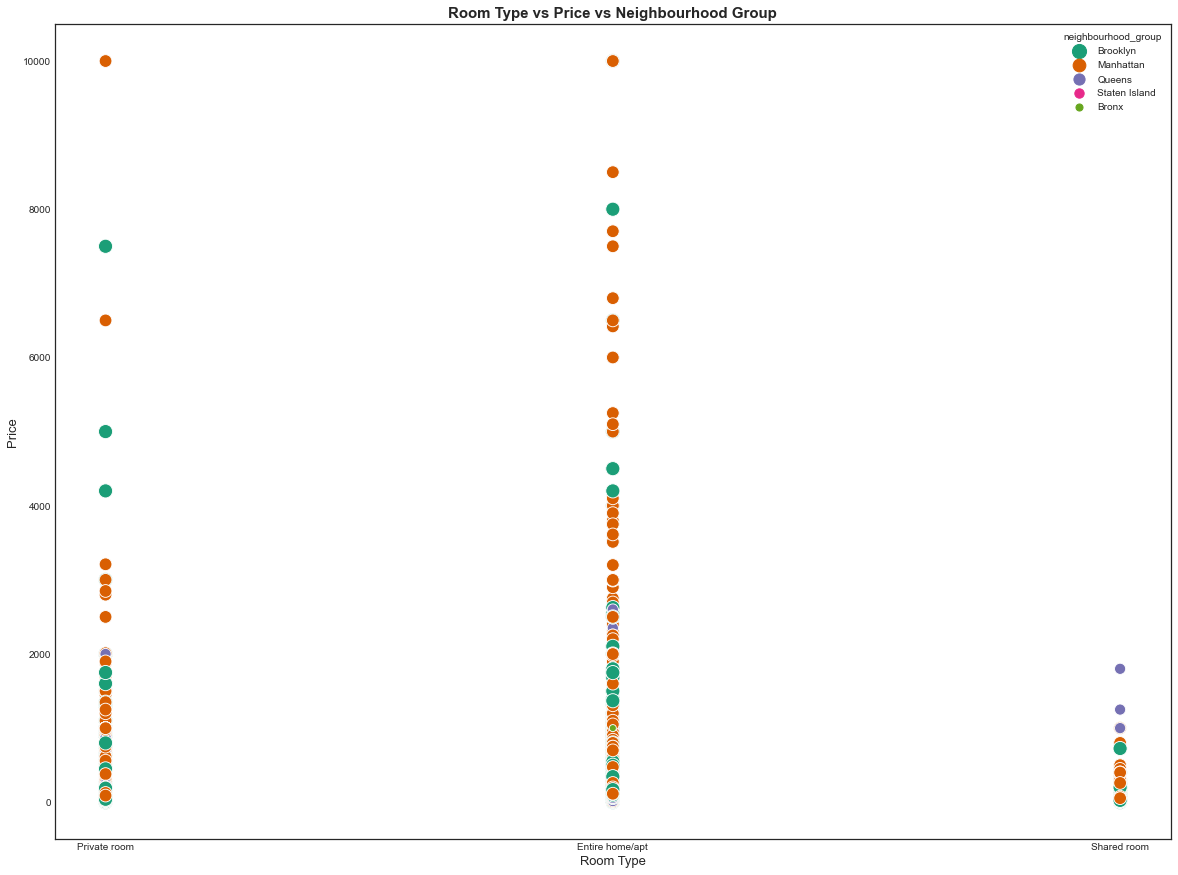

In [21]:
plt.figure(figsize=(20,15))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')

The next graph displays the correlation between the price and the number of reviews in each neighborhood group. Surprisingly, the graph demonstrates that lower-priced accommodations have received more reviews than higher-priced ones, revealing a negative correlation between price and the number of reviews. Moreover, the Manhattan, Brooklyn, and Queens areas have significantly higher review counts than other areas.





Text(0.5, 1.0, 'Price vs Number of Reviews vs Neighbourhood Group')

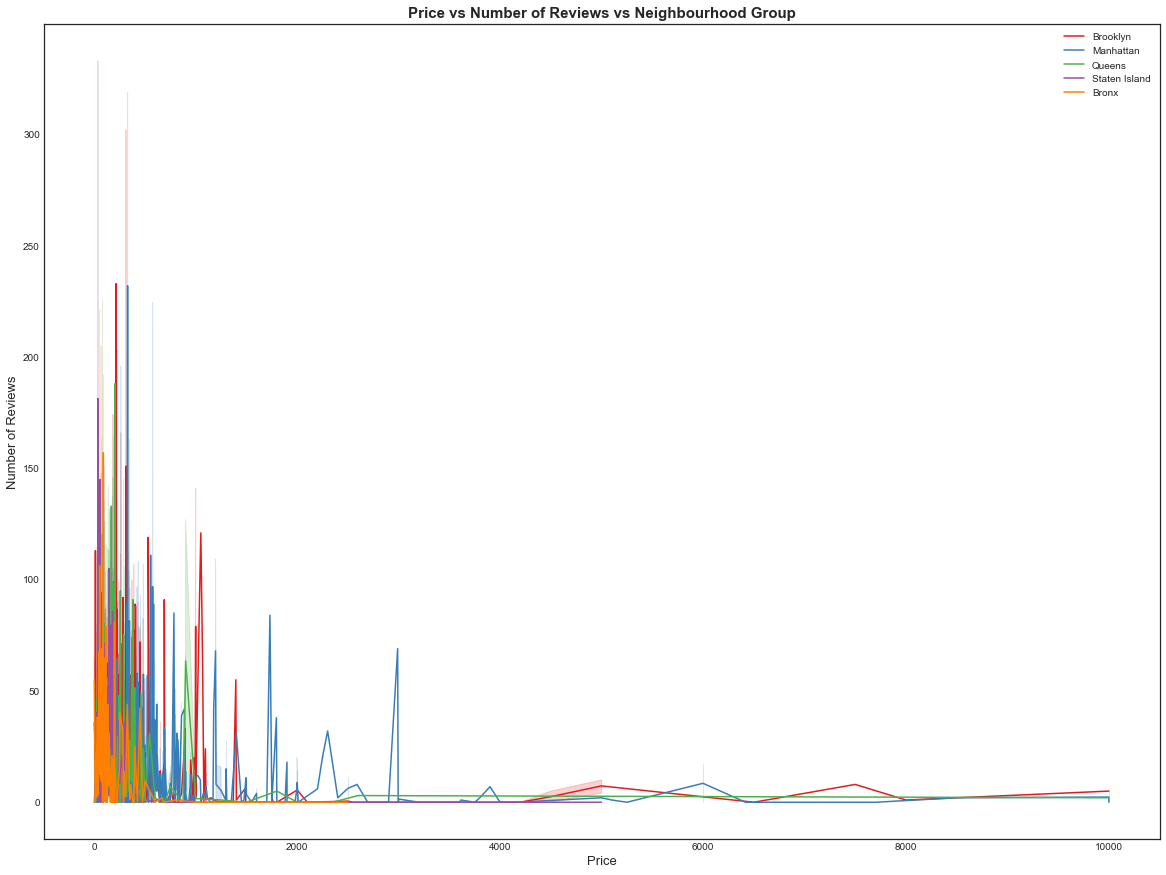

In [22]:
plt.figure(figsize=(20,15))
sns.set_palette("Set1")

sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Brooklyn'],
             label='Brooklyn')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Manhattan'],
             label='Manhattan')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Queens'],
             label='Queens')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Staten Island'],
             label='Staten Island')
sns.lineplot(x='price', y='number_of_reviews', 
             data=df[df['neighbourhood_group']=='Bronx'],
             label='Bronx')
plt.xlabel("Price", size=13)
plt.ylabel("Number of Reviews", size=13)
plt.title("Price vs Number of Reviews vs Neighbourhood Group",size=15, weight='bold')

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

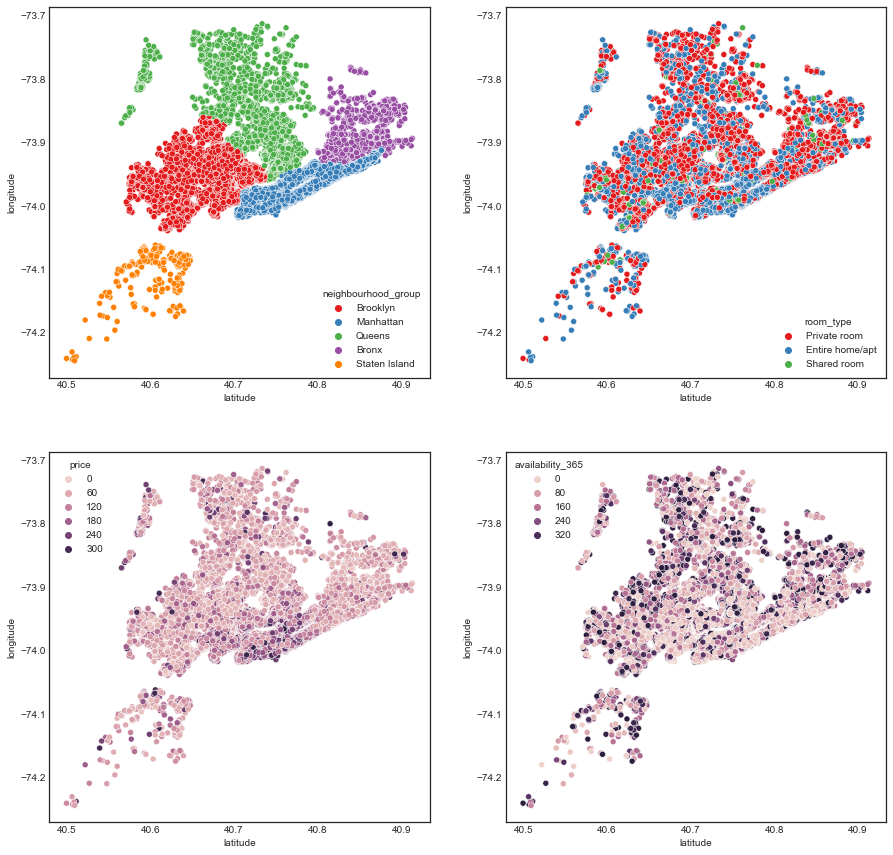

In [23]:
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
plt.subplot(221)
sns.scatterplot(x="latitude", y="longitude",hue="neighbourhood_group", data=df_new)
plt.subplot(222)
sns.scatterplot(x="latitude", y="longitude",hue="room_type", data=df_new)
plt.subplot(223)
sns.scatterplot(x="latitude", y="longitude",hue="price", data=df_new)
plt.subplot(224)
sns.scatterplot(x="latitude", y="longitude",hue="availability_365", data=df_new)

From the top corner right plot, we can infer that shared rooms represent a small proportions of the room types, as we said earlier. 

On the bottom left corner graph, we can infer that most of the expensives properties are located in Manhattan. 

Finally, from the last graph on the bottom right corner graph, we can say that there is more availability for airbnb bookings on all the boroughs of New York, except Manhattan where probably most of the tourists book their stay. 


Let us consider that a airbnb host with more than 50 reviews is considered as a top host. The following graph shows the locations of the top hosts 

In [24]:
import geopandas as gpd
import math
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

number_of_reviews = df_new[(df_new.number_of_reviews.isin(range(50,58)))]
# Creating a map
m_2 = folium.Map(location=[40.7128,-74.0060], tiles='cartodbpositron', zoom_start=13)

# Adding points to the map
for idx, row in number_of_reviews.iterrows():
    Marker([row['latitude'], row['longitude']]).add_to(m_2)

# Displaying the map
m_2

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

In [ ]:
sns.violinplot(
    x='id',
    y='price',
    data=df.nsmallest(50, 'id')
)

In [ ]:
df.columns.tolist()

In [ ]:
df.head(5)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

In [ ]:
def name_cleaning(s_):
    s_ = str(s_)
    modified_str = [elem.lower() for elem in s_.split(' ') if elem.lower() not in stop_words] 

    return(modified_str) 


In [ ]:
df['name_list']=df.name.apply(lambda x: name_cleaning(x))

In [ ]:
df['name_list'].head(5)

In [ ]:
print(Tot[:5])

In [ ]:
all_words=[elem for sublist in Tot for elem in sublist]

In [ ]:
all_words[:10]

In [ ]:
from collections import Counter
def find_most_common_words(liste, num_words):
    word_counts = Counter(liste)
    return [word for word, count in word_counts.most_common(num_words)]

In [ ]:
top_60=find_most_common_words(all_words, 60)

top_60 = [elem for elem in top_60 if elem != 'w/' and elem!= '|' and elem != '' and elem!= '&' and elem != '+']
print(top_60)

In [ ]:
def checkingrecu(liste):
    important_words=[elem for elem in liste if elem in top_60]
    return important_words

In [ ]:
df.shape

In [ ]:
df['most_recu_words']=df.name_list.apply(lambda x: checkingrecu(x))

In [ ]:
df['most_recu_words'][:10]

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

df = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('most_recu_words')),
                index=df.index,
                columns=mlb.classes_))

In [ ]:
features=df.columns.tolist()

In [ ]:
print(features)

In [ ]:


f,ax=plt.subplots(figsize=(30,30))
sns.heatmap(df[features[-59:]].corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

In [ ]:
correlations=df.corrwith(df['price_log']).tolist()
print(correlations)

In [ ]:
columns=df.columns.tolist()
print(columns)

In [ ]:
feature_list_index=[]
for i in range(len(correlations)):
    if abs(correlations[i])> 0.02:
        feature_list_index.append(i)
print(feature_list_index)

In [ ]:
feature_list_index.remove(9)

In [ ]:
print(feature_list_index)

In [ ]:
final_features=[]
for i in feature_list_index:
    final_features.append(columns[i])


final_features.remove('price_log')
#final_features. 

#final_features.extend(('longitude', 'latitude'))
print(final_features)

From this map, we can say that in general the variables are not strongly correlated. Only number_of_reviews and reviews_per_month have a positive correlation. 

We can now select our features for the modelling part

# 5. Feature selection and modelling

## 5.a) Feature selection

In [ ]:
df_features=df[final_features]
df_features.head()
df_features.shape

As neighbourhood_group and room_type are categorical variables, we will encode them thanks to pandas get_dummies function

In [ ]:
dummy_district=pd.get_dummies(df_features['neighbourhood_group'], prefix='district')
dummy_neighbourhood=pd.get_dummies(df_features['neighbourhood'], prefix='neighbourhood')
dummy_roomtype=pd.get_dummies(df_features['room_type'], prefix='dummy')
df_features = pd.concat([df_features,dummy_district,dummy_neighbourhood,dummy_roomtype],axis=1)
df_features.drop(['neighbourhood_group', 'neighbourhood','room_type'],axis=1, inplace=True)
df_features

We define price_log as our target variable

In [ ]:
df_target = df['price_log']
df_target.head()

In [ ]:
df_features.shape

In [ ]:
#look at neighbourhood dummies! host-id look at it. Get a dummy of how frequently he rented out.

In [ ]:
#del df_features['neighbourhood']
del df_features['name_list']
del df_features['host_name']
del df_features['last_review']

## 5.b) Modelling

Before splitting our features and target variable in train and test set, we normalize our data.

In [ ]:

from sklearn import preprocessing
X=preprocessing.scale(df_features)
y= df_target
X = pd.DataFrame(X, index=df_features.index, columns=df_features.columns)
print(X)
print(y)


In [ ]:
X.columns.tolist()

Our features data is not longer a dataframe. Therefore, we transform it into a pandas dataframe.

Then, we split the data into a 70-30 ratio

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=1)


# 3. Model Building  

Here, we define some metrics functions in order to display scores when running the models

In [ ]:
#define metrics
def rsqr_score(test, pred):
    rsqr = r2_score(test, pred)
    return rsqr

def rmse_score(test, pred):
    rmse = np.sqrt(mean_squared_error(test, pred))
    return rmse

def mse_score(test, pred):
    mse = mean_squared_error(test, pred)
    return mse

def mae_score(test, pred):
    mae = mean_absolute_error(test, pred)
    return mae

def mape_score(test, pred):
  mape = mean_absolute_percentage_error(test, pred)
  return mape

In [ ]:
# Print the scores
def print_score(test, pred):
    """Print calculated score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the R squared score
        print Root Mean Square Error score
        print Mean Square Error score
        print Mean Absolute Error score
    """

    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}")
    print(f"MSE: {mse_score(test, pred)}")
    print(f"MAE: {mae_score(test, pred)}")
    print(f"MAPE: {mape_score(test, pred)}")

### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from time import time

start = time()

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

dt_pred = model.predict(X_test)

print_score(y_test, dt_pred)

print(f"{round(time()-start, 2)}sec")

#### With Parameter Tuning 

In [ ]:
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3, 5, 6, 10, 15],
           'min_samples_split': [2, 3, 5, 10, 15, 20, 500],
           'min_samples_leaf': [2,3,5, 10, 15, 20, 500]}
decisiontree = DecisionTreeRegressor()
clf = GridSearchCV(decisiontree,
                    param_grid=params,
                    scoring='neg_mean_squared_error',
                         verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

start = time()

model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

rf_pred = model2.predict(X_test)

print_score(y_test, rf_pred)

print(f"{round(time()-start, 2)}sec")

#### With Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3, 5, 6, 10, 15],
           'min_samples_split': [2, 3, 5, 10],
           'min_samples_leaf': [2,3,5, 10, 15, 20, 500]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,
                    param_grid=params,
                    scoring='neg_mean_squared_error',
                         verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

### Extremely Randomized Trees Regressor

In [ ]:
start = time()

model3 = ExtraTreesRegressor()
model3.fit(X_train, y_train)

extra_pred = model3.predict(X_test)

print_score(y_test, extra_pred)


print(f"{round(time()-start, 2)}sec")

### Adaboost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor


start = time()

model4 = AdaBoostRegressor()
model4.fit(X_train, y_train)

ada_pred = model4.predict(X_test)

print_score(y_test, ada_pred)


print(f"{round(time()-start, 2)}sec")


#### With Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
params = { 
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'n_estimators': [100, 500]}
ada = AdaBoostRegressor()
clf = GridSearchCV(ada,
                    param_grid=params,
                    scoring='neg_mean_squared_error',
                         verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

### XG Boost Regressor

In [ ]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBRegressor

start = time()

model5 = XGBRegressor(max_depth=8)
model5.fit(X_train, y_train)

xg_pred = model5.predict(X_test)

print_score(y_test, xg_pred)


print(f"{round(time()-start, 2)}sec")


In [ ]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(np.exp(y_test)).round(),
        'Predicted Values': np.exp(xg_pred).round()}).head(20)

error_airbnb

#### With Parameter Tuning 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params = { 'max_depth': [3, 5, 6, 10, 15],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'n_estimators': [100, 500]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=1,
                         verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

In [ ]:
#xg_pred = model5.predict(X_test)
clf_Pred = clf.predict(X_test)
print_score(y_test, clf_Pred)

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

start = time()

model6 = GradientBoostingRegressor()
model6.fit(X_train, y_train)

gb_pred = model6.predict(X_test)

print_score(y_test, gb_pred)

print(f"{round(time()-start, 2)}sec")

# 4.Model Comparison

In [ ]:
print('-------------Decision Tree-----------')

print('MAE: %f'% mean_absolute_error(y_test, dt_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, dt_pred)))   
print('R2 %f' % r2_score(y_test, dt_pred))

print('---------------Random Forest ---------------------')

print('MAE: %f'% mean_absolute_error(y_test, rf_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, rf_pred)))   
print('R2 %f' % r2_score(y_test, rf_pred))


print('---------------Extremely Randomized Trees ---------------------')

print('MAE: %f'% mean_absolute_error(y_test, extra_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, extra_pred)))   
print('R2 %f' % r2_score(y_test, extra_pred))


print('---------------AdaBoost-----------------------')

print('MAE: %f' % mean_absolute_error(y_test, ada_pred))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, ada_pred)))
print('R2 %f' % r2_score(y_test, ada_pred))

print('---------------XG Boost-------------------')

print('MAE: %f' % mean_absolute_error(y_test,xg_pred)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,xg_pred))) #RMSE
print('R2 %f' % r2_score(y_test, xg_pred))

print('---------------Gradient Boosting-------------------')

print('MAE: %f' % mean_absolute_error(y_test,gb_pred)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,gb_pred))) #RMSE
print('R2 %f' % r2_score(y_test, gb_pred))


In [ ]:
fig, ((ax1, ax2, ax3, ax4, ax5)) = plt.subplots(1, 5, figsize=(30, 10))
fig.suptitle('True Values vs Predictions')

ax1.scatter(y_test, dt_pred)
ax1.set_title('Decision Tree')

ax2.scatter(y_test, rf_pred)
ax2.set_title('Random Forest')

ax3.scatter(y_test, ada_pred)
ax3.set_title('AdaBoost')

ax4.scatter(y_test, gb_pred)
ax4.set_title('Gradient Boosting')

ax5.scatter(y_test, xg_pred)
ax5.set_title('XG Boost')



for ax in fig.get_axes():
    ax.set(xlabel='True Values', ylabel='Predictions')

In [2]:
#test

In [1]:
#testt